# Support Vector Machine (SVM)

Las Máquinas de Vectores de Soporte son un conjunto de algoritmos utilizados tanto en escenarios de clasificación como de regresión.

La idea principal de SVM es partir de un conjunto de puntos en un plano que pertenecen a dos clases distintas: 

<img src="svm_1.png">

El objetivo es encontrar una recta o hiperplano que permita separar ambos bloques de puntos, por ejemplo:

<img src="svm_2.png">

Como se puede apreciar en la imagen anterior, existen distintas rectas que pueden dividir los puntos, analizando cada una de ellas se puede ver lo siguiente:

**Recta H1:** La divisón de los bloques de puntos no es correcta.

**Recta H2:** La divisón de los bloques de puntos es correcta, aunque está muy proxima a los puntos negros lo cual puede afectar la clasificación de los datos en el momento de la predicción.

**Recta H3:** La divisón de los bloques de puntos es correcta y maximiza la distancia mínima a los puntos negros y blancos los cual generalmente mejora la clasificación de los datos en el momento de la predicción

<img src="svm_3.png">

Los puntos **A** y **B** son los más próximos a la recta **H3** y determinan la posición de la recta. Si esta recta existe (si los puntos son linealmente separables) se denomina **hiperplano de máximo margen** (maximum-margin hyperplane), y los puntos A y B se denominan **vectores de soporte** (support vectors). La suma de las distancias que separan los puntos A y B del hiperplano de máximo margen se denomina **margen**.

### Kernel Trick

Cuando los puntos a clasificar no son linealmente separables es necesario aplicar transformaciones a los mismos tratando de situarlos en un espacio de mayor dimensionalidad.

**Ejemplo:** Para los siguientes puntos -5, -2, 0, 1, 6 se puede apreciar que no se pueden separar linealmente.

<img src="svm_4.png">

Los puntos anteriores están en un espacio de una dimensión, y mediante la aplicación de una transformación podemos llevar estos puntos (en un espacio de una dimensión) a un plano (espacio de dos dimensiones) de forma que su nueva coordenada **x** sea la misma coordenada x que tienen en el espacio original, pero que su coordenada **y** sea igual al cuadrado de su coordenada **x**. 

Las coordenadas resultantes en el eje **y** serían: 25, 4, 0, 1, 36

<img src="svm_5.png">


En el nuevo espacio, sí es posible crear una recta que separe ambos grupos de puntos. SVM buscaría la recta que maximizase la distancia a ambos grupos de puntos en este nuevo espacio:

<img src="svm_6.png">

En la imagen anterior podemos distinguir el hiperplano de máximo margen (línea negra continua) y los vectores de soporte (bolas azul y naranja con borde negro). Para realizar una predicción sobre una muestra cualquiera, bastaría con aplicarle la misma transformación y ver a qué lado del hiperplano de máximo margen cae: si cayese por encima, se predeciría una bola azul. Si cayese por debajo, se predeciría una bola naranja.

Esta transformación de las muestras desde el espacio original hasta una espacio de mayor dimensionalidad es llamada "kernel trick" (truco del kernel).

## Kernels

Los vectores correspondientes al bloque de entrenamiento son mapeados a un espacio de mayor dimensionalidad por una cierta función, el **kernel** es el responsable de este mapeo. Un kernel viene determinado por una matriz cuadrada de dimensión igual al número de muestras siendo analizadas, y el contenido de esta matriz es la resultante de aplicar la función de mapeo al conjunto de entrenamiento.

Scikit-learn ofrece 4 kernels básicos. En las siguientes fórmulas **xi** y **xj** representan los valores de la matriz de coeficientes del conjunto de entrenamiento, **XT** la transpuesta de **X**, **‖X‖** representa la norma **L2** de **X**, y el punto (.) representa el producto de dos matrices.

**Linear** La función aplicada es

<img src="svm_7.png">

**Polynomial** La función aplicada es la siguiente, donde γ viene dada por el parámetro gamma de la función SVC, r por coef0 y d por el parámetro degree.

<img src="svm_8.png">

**Radial Basis Function** La función aplicada es la siguiente,‖Xi-Xj‖ representa una matriz cuadrada con la distancia euclídea entre cada par de puntos de X. Esta matriz puede conseguirse con la función sklearn.metrics.pairwise.euclidean_distances. Al igual que en el caso del kernel polinómico, γ viene dado por el parámetro gamma de SVC.

<img src="svm_9.png">

**Sigmoid** La función aplicada es la siguiente, donde γ y r vienen dados por los parámetros gamma y coef0, respectivamente.

<img src="svm_10.png">


<img src="svm_11.png">

## Ejemplo:

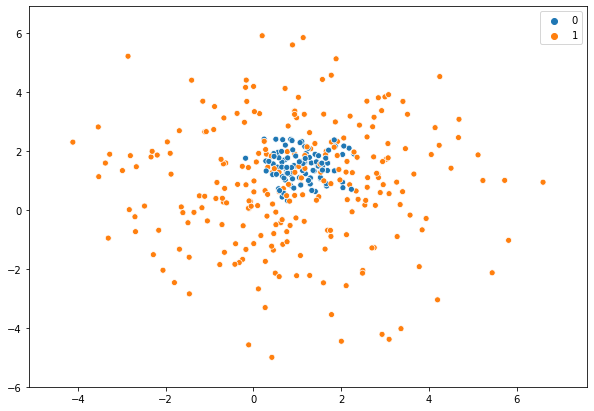

In [11]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import numpy as np
X, y = make_blobs(n_samples = [100, 250], random_state = 0, cluster_std = [0.5, 2.0], center_box = [(0, 0), (2, 2)])
minX = min(X[:, 0]) - 1
maxX = max(X[:, 0]) + 1
minY = min(X[:, 1]) - 1
maxY = max(X[:, 1]) + 1
fig, ax = plt.subplots(figsize = (10, 7))
plt.axis([minX, maxX, minY, maxY])
sns.scatterplot(X[:, 0], X[:, 1], hue = y);

In [9]:
model = svm.SVC(gamma = "auto", kernel = "rbf")
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Realizando predicciones

In [12]:
#clase 1 (naranja)
sample = np.array([0, 0]).reshape(-1, 2)
model.predict(sample)

array([1])

In [14]:
#clase 0 (azul)
sample = np.array([1, 2]).reshape(-1, 2)
model.predict(sample)

array([0])

### Distribución de las áreas a las que se asignaría cada clase 

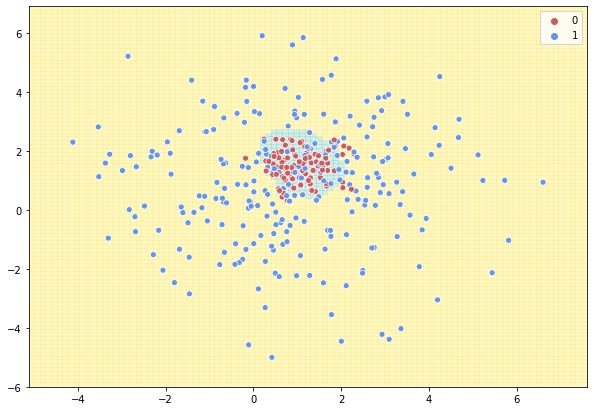

In [15]:
def p(model, x, y):
    sample = np.array([x, y]).reshape(-1, 2)
    return model.predict(sample)[0]
pv = np.vectorize(p)
n = 100
ax = np.linspace(minX, maxX, n)
ay = np.linspace(minY, maxY, n)
xx, yy = np.meshgrid(ax, ay)
palette = ["IndianRed", "CornflowerBlue"]
zz = pv(model, xx, yy)
fig, ax = plt.subplots(figsize = (10, 7))
plt.pcolormesh(xx, yy, zz, cmap = plt.get_cmap('Set3'), alpha = 0.4);
sns.scatterplot(X[:, 0], X[:, 1], hue = y, palette = palette);

### Propiedades, similitudes, diferencias ,ventajas y desventajas sobre otros algoritmos y modelos

SVM se utilizan para la clasificación y está basado en la construcción de un hiperplano óptimo en forma de superficie de decisión, de modo que el margen de separación entre las dos clases se amplie al máximo. Como ventaja principal se tiene que puede modelar ralaciones complejas no lineales y como desventajas que se tiene la necesidad de seleccionar una buena función de kernel y que los parámetros del modelo son difíciles de interpretar. También tiene la desventaja que requiere grandes cantidades de memoria y procesamiento y cuando se tienen muchos datos toma demasiado tiempo para entrenar.

Por su parte, la Regresión logística es apropiada de realizar cuando la variable dependientes es binaria, es un análisis predictivo fácil de entender y el uso de la regularización es efectivo en el mismo, como desventajas se puede indicar que a veces es muy simple para captar relaciones complejas entre variables.

Respecto a KNN y árboles de desición una de las similitudes principales con SVM es que son considerados algoritmos no paramétricos. KNN es un algoritmo muy simple y  fácil de entender aunque puede llegar a ser costoso y lento para hacer predicciones nuevas.  Los árboles de decisión a través de diagramas de construcción lógica representan y categorizan una serie de condiciones que ocurren de forma sucesiva y permiten realizar clasificaciones, tienen como ventaja que son fáciles de entender y permiten modelar relaciones complejas. 

Respecto a Naive Bayes también es otro algoritmo de clasificación basado en un modelo probabilístico, tiene como ventajas que es fácil y rápido en entrenar y no requiere demasiada memoria. Como desventajas podemos mencionar que falla al estimar las caracterísiticas atípicas y cuando algunas de estas son irrelevantes.



.